In [1]:
!which python
!echo $RMG

/work/westgroup/ChrisB/miniconda3/envs/rmg_thesis/bin/python
/work/westgroup/ChrisB/_04_thesis/rmg_thesis/RMG-Py/rmg.py


In [1]:
# load the 111 mechanism, 211 platinum mechanism, and 211 Nickel mechanism
import sys

import os
import shutil
import sys
import itertools
import cantera as ct

from rmgpy.chemkin import load_chemkin_file
from rmgpy.data.surface import MetalPropertyLibrary, SitePropertyLibrary, MetalPropertyDatabase, SitePropertyDatabase
from rmgpy.data.thermo import ThermoDatabase
ev_2_j_kmol = 1000*1000*96.485

In [ ]:
from pyrms import rms

In [2]:
meoh_res_folder = "/work/westgroup/ChrisB/_01_MeOH_repos/00_thesis_data/peuqse_runs/"

path_111 = os.path.join(meoh_res_folder, "peuqse_methanol_12Aug_surfarea/rmg_model/")
path_211_ni = os.path.join(meoh_res_folder, "rmg_211_model/14Aug2024_methanol_211_fromNi/")
path_211_pt = os.path.join(meoh_res_folder, "rmg_211_model/08Aug25_from_Pt111/")

In [3]:
#load the thermodynamics database
thermoDatabase = ThermoDatabase()
libraries = ['surfaceThermoPt111']
if sys.platform == "darwin":
    thermoDatabase.load(path="/Users/blais.ch/Documents/_01_code/RMG_env_1/RMG-database/input/thermo", libraries = libraries)
else: 
    thermoDatabase.load(path='/work/westgroup/ChrisB/_04_thesis/rmg_thesis/RMG-database/input/thermo', libraries = libraries)
    
thermoDatabase.load_surface()

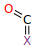

In [ ]:
# load a species
# test the function. load model each time 
chemkin_path = os.path.join(path_111, "chemkin", 'chem_annotated-gas.inp')
chemkin_surf_path = os.path.join(path_111, "chemkin", 'chem_annotated-surface.inp')
dictionary_path = os.path.join(path_111, "chemkin", 'species_dictionary.txt')

# load_chemkin_file
species, reactions = load_chemkin_file(chemkin_surf_path, dictionary_path)
# identify a surface species to use for testing
surf_species = species[5]
surf_species.generate_resonance_structures()
display(surf_species)
spec_thermo = surf_species.thermo.to_thermo_data()
surf_species.thermo = spec_thermo
thermo_list = thermoDatabase.get_all_thermo_data(surf_species)
E_ad_old = (spec_thermo.H298.value_si)/9.68e4

# new_thermo = thermoDatabase.correct_binding_energies_extended(spec_thermo, surf_species, metal_to_scale_from='Pt',
#                                        metal_to_scale_to='Rh', facet_to_scale_from='111', facet_to_scale_to='211')
# print("old E_ad = ", E_ad_old)